# Exploratory Data Analysis for Toxic Comments Classification Web App

    This is an exploratory data analysis for the text in both train set and test set

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

Read Train and Test dataset and fill the missing value with single space. Also, select the coment text from both train and test set and then concatenate them together for the further analysis 

In [68]:
train = pd.read_csv('train.csv').fillna(' ')
test = pd.read_csv('test.csv').fillna(' ')

train_text = train['comment_text']
test_text = test['comment_text']
all_text = pd.concat([train_text, test_text]) # Concatenate

# Create the toxic and not for our prediction response
train['toxic_count'] = [a + b + c + x + y + z for a ,b ,c, x, y, z in 
                        zip(train['toxic'], train['severe_toxic'], train['obscene'],
                           train['threat'], train['insult'], train['identity_hate'])]
train.loc[train['toxic_count'] > 0, 'is_toxic'] = 1
train.loc[train['toxic_count'] == 0, 'is_toxic'] = 0

Visualize the distributions of the training data

In [69]:
freq = train.groupby('is_toxic').size()
freq

is_toxic
0.0    143346
1.0     16225
dtype: int64

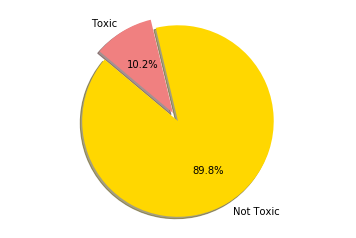

In [71]:
# Data to plot
labels = 'Not Toxic', 'Toxic'
colors = ['gold', 'lightcoral', 'skyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(freq, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

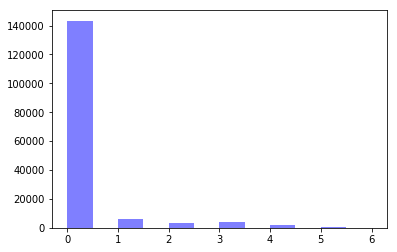

In [100]:
num_bins = 12
n, bins, patches = plt.hist(train['toxic_count'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

   Use TfidfVectorizer to convert a collection of raw documents to a matrix of TF-IDF features.

In [72]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True, 
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    max_features=5000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

In [76]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 5),
    max_features=30000)

In [79]:
#char_vectorizer.fit(all_text)
train_features = char_vectorizer.transform(train_text)
test_features = char_vectorizer.transform(test_text)

In [84]:
train_features = hstack([train_features, train_word_features])
test_features = hstack([test_features, test_word_features])